In [1]:
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import arviz as az
import pymc3 as pm

from ipywidgets import interact
import ipywidgets as ipyw
from IPython.display import IFrame

In [2]:
az.style.use('arviz-darkgrid')

In [3]:
%%HTML
<style>

.CodeMirror {
    width: 100vw;
}

.container {
    width: 99% !important;
}

.rendered_html {
  font-size:0.8em;
}
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}


body {
  font-family: Ubuntu;
  background: #F0F0F0;
  background-color: #F0F0F0;
}


.reveal h1,
.reveal h2,
.reveal h3,
.reveal h4,
.reveal h5,
.reveal h6 {
  margin: 0 0 20px 0;
  color: #2a2eec;
  font-family: Ubuntu;
  line-height: 0.9em;
  letter-spacing: 0.02em;
  text-transform: none;
  text-shadow: none;
}

.reveal blockquote {
  display: block;
  position: relative;
  background: #fa7c17;
  border-radius: 15px;
  box-shadow: 0px 0px 2px rgba(0, 0, 0, 0.2);
  font-weight: bold;
}

</style>

In [4]:
from traitlets.config.manager import BaseJSONConfigManager
path = "/home/osvaldo/anaconda3/etc/jupyter/nbconfig"
cm = BaseJSONConfigManager(config_dir=path)
cm.update("livereveal", {
              "theme": "serif",
              "transition": "zoom",
              "start_slideshow_at": "selected",
              "controls": "False",
              "progress": "False",
              "shortcut": "False",});


<center><img src="img/logo_inst.png" width="750">
<br>
<br>
<br>
<br>
<h1 align="center">Introducción a la Inferencia Bayesiana</h1>



<br>
<br>
<br>
<br>
<br>

## Objetivos

* Comprender el teorema de Bayes 
* Entender las distribuciones a priori, a posteriori y a posteriori predictiva 

## Modelado Bayesiano

<br>

* La estadística es una forma de modelado 


* Los modelos estadísticos generan datos


* Un modelo Bayesiano tiene dos requisitos:
    1. Las cantidades desconocidas (parámeteros) son modeladas usando **distribuciones de probabilidad**
    2. Las cantidades conocidas (datos) son combinadas con la **distribución a priori de parámetros** usando el **Teorema de Bayes**

## Bayesian statistics

<br>

* Las distribuciones de probabiliad _distribuyen_ probabilidades (credibilidades) entre un cierto conjunto de eventos


* La estadística Bayesiana es la re-distribución de probabilidades (credibilidades)

## Teorema de Bayes

<br>

$$\underbrace{p(\theta \mid y)}_{a posteriori} = \frac{\overbrace{p(y \mid \theta)}^{\text{likelihood/verosimilitud}} \overbrace{p(\theta)}^{a priori}}{\underbrace{\color{red}{p(y)}}_{\text{likelihood/verosimilitud marginal}}}$$
<br>

* $\theta$ representa los parámetros en nuestros modelos (lo que queremos averiguar o aprender)
* $y$ representa los datos


* El objeto central de la estadística Bayesiana es la distribución _a posteriori_.


* $\color{red}{p(y) = \int_{\theta} p(y \mid \theta)p(\theta) d(\theta)}$ Generalmente no tiene solución analítica o es muy costosa
--> Métodos numéricos al rescate!

## Estadística Bayesian en 3 pasos (flujo Bayesiano simplificado)

<br>
 

1. **Crear un modelo probabilista**. Especificar un modelo de probabilidad que incluya algún tipo de conocimiento previo sobre los parámetros del modelo


2. **Condicionar el modelo a los datos observados**. Usando el teorema de Bayes la distribución a priori es actualizada de acuerdo a los datos observados,  obteniendose la distribución _a posteriori_.


3. <font color = "gray"> **Evaluar el ajuste del modelo a los datos y la sensibilidad de las conclusiones a cambios en los supuestos del modelo.**. </font>

## Ejemplo de distribución a posteriori

Nos regalan una bolsa de Rocklets, y nos dicen que la proporción de confites de cada color es la misma, pero no nos dicen de cuántos colores distintos pueden ser los confites. 

Se trata de estimar   el número $k$ de colores, a partir de la observación de $n$ confites. 

Supongamos que basándonos en nuestra experiencia cada bolsa puede tener entre 5 y 8 colores con la siguiente distribución de probabilidades 

   |k    | 5 | 6| 7| 8|
   |-----|---|--|--|--|
   |$p$(k)|$\frac{1}{10}$| $\frac{3}{10}$ | $\frac{3}{10}$ | $\frac{3}{10}$|
		

## Ejemplo de distribución a posteriori

Suponemos que hemos observado $x_1=VBV$, entonces tenemos. 

|k    | $\pi$(k)| $\overbrace{f(VBV|k)} - \frac{k-1}{k^2}$ &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;| $f(VBV,k)$ &nbsp; &nbsp; &nbsp; &nbsp;| $f(k|VBV)$  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;|
|-----|---------|-----------------------------------------|-----------|-----------|
5 | 0.1 | 0.160 | 0.016 | 0.125|
		|6 | 0.3 | 0.139 | 0.042 | 0.328|
		|7 | 0.3 | 0.122 | 0.037 | 0.289|
		|8 | 0.3 | 0.109 | 0.033 | 0.258|
        
$\sum_k f(VBV,k)=$0.128

Tomamos otro caramelo y es naranja $x_2=VBVN$, repitiendo  el análisis tenemos


## Ejemplo de distribución a posteriori

Tomamos otro caramelo y es naranja $x_2=VBVN$, repitiendo  el análisis tenemos


|k    | $\pi$(k)| $\overbrace{f(VBV|k)} {\frac{(k-1)(k-2)}{k^3}}$| $f(VBV,k)$ | $f(k|VBV)$ |
|-----|---------|-----------------------------------------|-----------|-----------|
        5 | 0.125 | 0.096 | 0.012 | 0.135|
		|6 | 0.328 | 0.093 | 0.031 | 0.348|
            |7 | 0.289 | 0.087 | 0.025 | 0.281|
		|8 | 0.258 | 0.082 | 0.021 | 0.236|
      
$\sum_k f(VBVN,k)=$0.089 

## Ejemplos de distribuciones conjugadas

<br>

En algunos casos la constante de normalización se puede calcular analíticamente

Para ciertos likelihood existe un prior tal que la distribución a posteriori tiene la misma forma funcional que el prior. 
A estos priors se les llama conjugados (respecto de un likelihood)

### Modelo beta-binomial (o beta-bernoulli)

<br>

Sea $\textbf{y}=(y_1,\cdots, y_n)$ una m.a.s. de  $\underbrace{Y \sim \textit{Bernoulli}(p)}_{p(\theta) \text{ (posterior)} }$.

Sea $p\sim \underbrace{\operatorname{Beta}(\alpha, \beta)}_{p(\theta) \text{ (prior)}}$ con $\alpha>0$ y $\beta>0$.  

Entonces la distribución a posteriori está dada por:

$$\operatorname{Beta}\left(\alpha + \sum_{i=1}^n x_i; \beta +n- \sum_{i=1}^n x_i\right).$$ 


### Modelo gamma-poisson

<br>


Sea $\textbf{y}=(y_1,\cdots, y_n)$ una m.a.s. de  $Y\sim \textit{Poisson}(\theta)$, $\theta>0$.

Sea $\theta\sim \operatorname{Gamma}(\alpha, \beta)$ con $\alpha>0$ y $\beta>0$.

Entonces la distribución a posteriori está dada por:

$$\operatorname{Gamma}\left(\alpha + \sum_{i=1}^n x_i; (\beta^{-1} + n)^{-1}\right).$$



### Modelo gamma-poisson

<br>

Sea $\textbf{y}=(y_1,\cdots, y_n)$ una m.a.s. de  $Y\sim \mathcal{N}(\theta, \sigma^2),\,\,-\infty< \theta<\infty$, $\sigma^2$ conocido. 

Sea $\theta\sim\mathcal{N}(\mu, \nu^2)$.


Entonces la distribución a posteriori está dada por:


$\mathcal{N}(\mu_1, \nu_1^2)$, con
$$\mu_1=\frac{\sigma^2}{\sigma^2+n\nu^2}\mu+\frac{n\nu^2}{\sigma^2+n\nu^2}\overline{x}, \hspace{2cm} \nu_1^2=\frac{\sigma^2\nu^2}{\sigma^2+n\nu^2}$$


## The statistics of magical coins

<br>

* We are going to model tossing a coin
    * What is the probability of gastric cancer when taking low-dose of aspirin?
    * What is the probability that people will agree on legalizing medical abortion?



* Our parameter, $\theta$, can take values in the interval [0, 1]
    * $\theta = 1 \implies$ always get heads
    * $\theta = 0 \implies$ always get tails.


* According to Bayes' theorem we need to define a likelihood and a prior:


$$p(\theta \mid y) \propto \underbrace{p(y \mid \theta)}_{\text{?}} \underbrace{p(\theta)}_{?}$$


## The beta-binomial model

<br>
<br>
Mathematical representation
$$
\theta \sim \operatorname{Beta}(\alpha, \beta) \\
y \sim \operatorname{Bin}(n=1, p=\theta)
$$


<br>

Visual representation
<img src="img/modelo_1_moneda.png" width=300>

From top to bottom, we first have the prior, then the likelihood, and finally the data. The arrows indicate how the part of the model are related the symbol $\sim$ indicates the stochastic nature of the variables.

In [5]:
def beta(α, β):
    x = np.linspace(0, 1, 130)
    beta = stats.beta(α, β)
    plt.plot(x, beta.pdf(x))
    plt.yticks([])
    plt.ylim(0, 6)

interact(beta,
         α=ipyw.FloatSlider(min=0.5, max=7, step=0.5, value=2),
         β=ipyw.FloatSlider(min=0.5, max=7, step=0.5, value=2));

interactive(children=(FloatSlider(value=2.0, description='α', max=7.0, min=0.5, step=0.5), FloatSlider(value=2…

In [6]:
def binomial(n, θ):
    bino = stats.binom(
        n, θ)
    plt.bar(range(n+1), bino.pmf(range(n+1)))
    plt.xticks(range(n+1))
    plt.ylim(0, 1);

interact(binomial, n=ipyw.IntSlider(min=1, max=10, value=1), θ=ipyw.FloatSlider(min=0, max=1, step=0.05, value=0.5));

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), FloatSlider(value=0.5, description='…

### The posterior

It can be shown that whenever we use a beta distribution as prior and a binomial distribution as likelihood we will obtain a posterior that will be a beta distribution with the following parameters:


<br>

$$
p(\theta \mid y) \propto \operatorname{Beta}(\alpha=\alpha_{prior} + y , \quad \beta= \beta_{prior} + N - y)
$$

<br>

When it is fulfilled that for a certain likelihood the functional form of a prior and that of the a posterior is the same, it is said that the prior is conjugated with the _likelihood_.

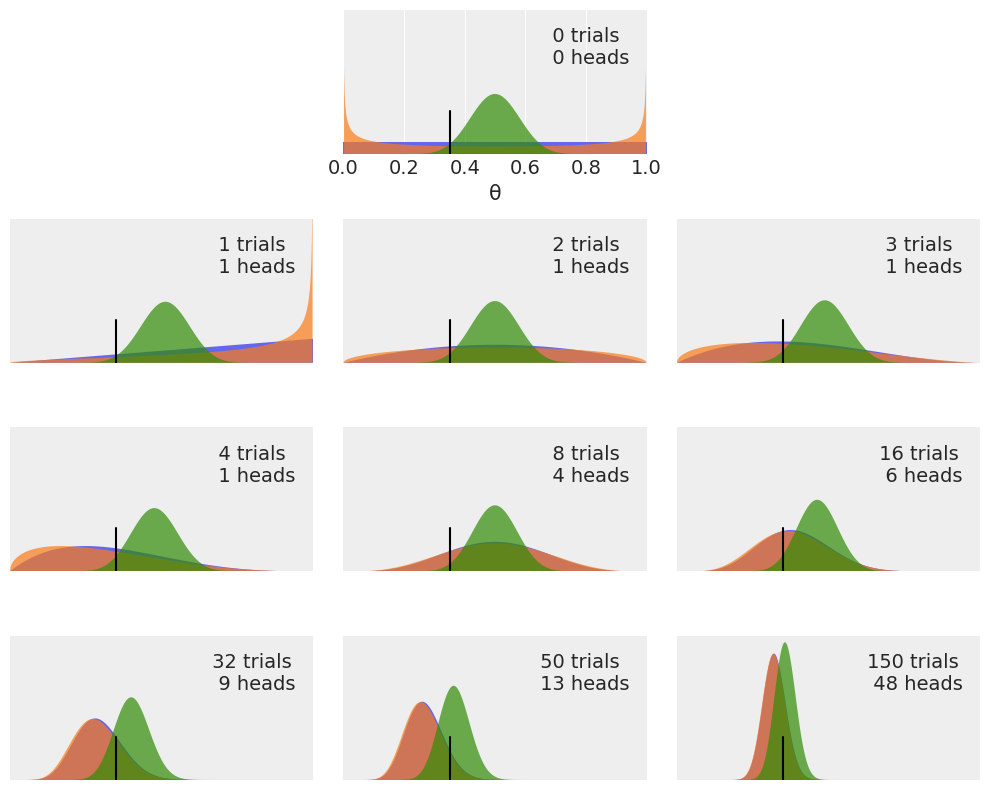

In [7]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (0.5, 0.5), (20, 20)]
dist = stats.beta
x = np.linspace(0, 1, 500)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

# Exercises


1. Starting from the definition of conditional probability $p(A \mid B) = \frac{p(A, B)}{p(B)}$ obtain Bayes' theorem

2. 

3. Use the following interactive widget to explore different combinations of priors and likelihoods. Summarize the observations that you consider most relevant.